# SOK-1006 V25

## Forelesning 12 - Mer om kostnadsminimering

### 1. Oppskrift for kostnadsminimering

Vi ser på en bedrift som bruker arbeidskraft og kapital til å produsere et gode gjennom bruk av følgende teknologi: $x=f(N,K)$. Da kan vi skrive kostnadsminimeringsproblemet som:        
$$ min_{N,K}\;wN+rK \;\; ubb\;\; x_0=f(N,K).$$

Vi har oppdaget at to ting må være oppfylt for å finne verdier på $N,K$ som gir et kostnadsminimum:

$$\begin{align}
\frac{w}{r}&=\frac{f'_N}{f'_K} \tag{1}\\
x_0 &=f(N,K) \tag {2}\\
\end{align}$$

La oss bruke disse betingelsene i et eksempel hvor $f(N,K)=N^{0.5}K^{0.5}, w=350, r=500, x_0=10.$



In [33]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

In [34]:
N,K=sp.symbols('N K', real=True, positive=True)

In [35]:
# produktfunksjon
def x(N,K):
    return (N**.5)*(K**.5)
x(N,K)

K**0.5*N**0.5

In [36]:
# likning 1, mtsb
df_K=sp.diff(x(N,K),K)
df_N=sp.diff(x(N,K),N)
mtsb=df_N/df_K
display(mtsb)


1.0*K**1.0/N**1.0

Da kan likning (1) skrives $\frac{350}{500}=\frac{K}{N}$, eller $K=\frac{350}{500}N$. Dette kan vi sette inn i likning (2) for å sikre at den optimale kombinasjonen tilfredsstiller produksjonsbetingelsen.

In [37]:
prod=x(N,K).subs(K, 350*N/500)
display(prod)

0.836660026534076*N**1.0

In [38]:
# finn optimal verdi på N
opt_N = sp.solve(prod-10, N)
display(opt_N)

[11.9522860933439]

Dette er optimal mengde arbeidskraft! Optimal mengde kapital blir da $K=\frac{350}{500}(11.95)=8.365$. Da har vi funnet mengder arbeidskraft og kapital som minimerer produksjonskostnaden på 10 enheter. Tenk at vi vil løse problemet for et vilkårlig produksjonsnivå $X$. Da løser vi følgende:

In [39]:
X=sp.symbols('X', positive=True, real=True)
løsn_X=sp.solve([x(N,K)-X, K-(350/500)*N], K,N)
løsn_X

[(0.836660026534076*X, 1.19522860933439*X)]

Dette er den optimale tilpasningen for å produsere X enheter: $K=0.8367X, N=1.1952X$. Legg merke til at løsningen er ei liste, dvs i [....]. I lista har vi en tuple i (......). For å trekke ut løsningen for K skriver vi `løsn_X[0][0]`, og løsningen for N blir `løsn_X[0][1]`. Dermed kan vi beregne kostnaden for å produsere X enheter.

In [40]:
def var_kost(X):
    return 500*løsn_X[0][0]+350*løsn_X[0][1]
var_kost(X)

836.660026534076*X

Dette viser den minimale kostnaden av å produsere X enheter. Vi vil vise løsningen som vi har funnet grafisk. **Nå må vi passe på**. I definisjonen av `var_kost(X)` brukte vi løsningen fra en Sympy beregning. For at vi skal bruke den i tegningen kan vi gjøre om med `sp.lambdify`:

In [41]:
C_X=sp.lambdify(
    (X), 
    var_kost(X)
)
C_X(X)

836.660026534076*X

Først tegner vi produksjonsisokvanten for $X=10$.

In [42]:
# Definer isokvanter
iso_X=sp.solve(x(N,K)-X,K)[0]
iso_X

X**2/N

Da er $K=\frac{X^2}{N}$ isokvanten for X enheter ferdigprodukt. Vi må gjøre dette om til et uttrykk som numpy kjenner igjen for å tegne det (`sp.lambdify`):

In [43]:
iso_fn=sp.lambdify(
    (X,N), 
    iso_X
)
iso_fn(X,N)

X**2/N

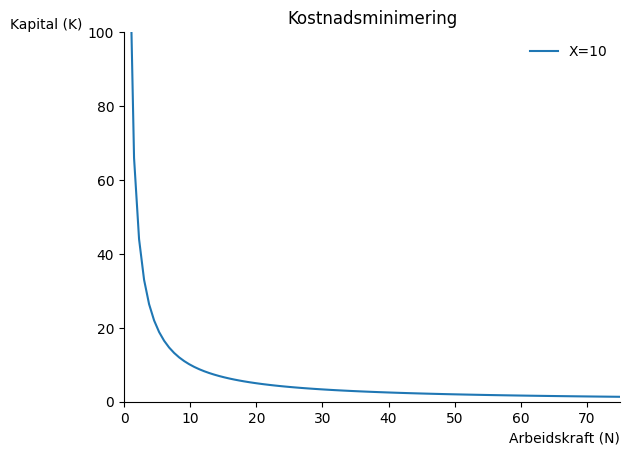

In [44]:
# tegne isokvanten for X=10

n=np.linspace(0.001,75, 100)

fig1, ax = plt.subplots()
ax.set_ylabel('Kapital (K)', loc='top', rotation = 0)
ax.set_xlabel('Arbeidskraft (N)', loc='right')
ax.set(xlim=(0,75))
ax.set(ylim=(0,100))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
                

# plott funksjonen

ax.plot(n,iso_fn(10,n), label='X=10')

# tittel
ax.set_title('Kostnadsminimering')

#vis navnene:
ax.legend(loc='best',frameon=False);

Tegne inn isokostnadskurver. For et pengebeløp C vil isokostnadsfunksjon være: $C=wN+rK$. For å tegne dette i figuren må vi få K på venstresiden: $K=\frac{C}{r}-\frac{wN}{r}$. Dette er en rett linje med helning $\frac{-w}{r}$. Her er $\frac{w}{r}$ den relative prisen på arbeidskraft.

In [45]:
# Sett inn i uttrykket for isokost
def isokost(X,N):
    return C_X(X)/500 -(350/500)*N
isokost(X,N)

-0.7*N + 1.67332005306815*X

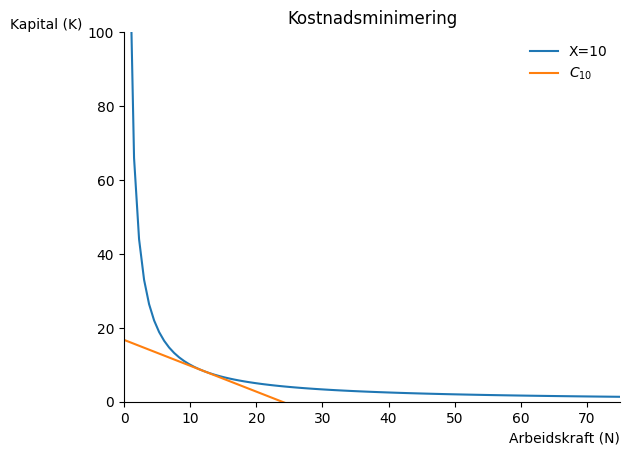

In [46]:
ax.plot(n, isokost(10,n), label=r'$C_{10}$')
ax.legend(loc='best',frameon=False)
fig1

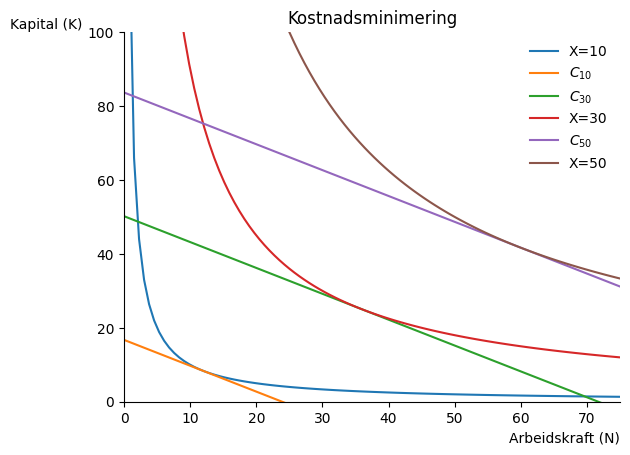

In [47]:
# sett inn isokvanter for X=30 og X=50, samt minkost for disse

X_verdier = [30, 50]

for X in X_verdier:
    ax.plot(n, isokost(X,n), label='$C_{' + str(X) + '}$')
    ax.plot(n,iso_fn(X,n), label=f'X={X}')

ax.legend(loc='best',frameon=False)
fig1


Tidligere fant vi et fast forhold mellom kapital og arbeidskraft i en kostnadsminimerende løsning: $K=\frac{w}{r}N$. Dette kalles *substitumalen* og går gjennom alle kostnadsminimerende punkter.

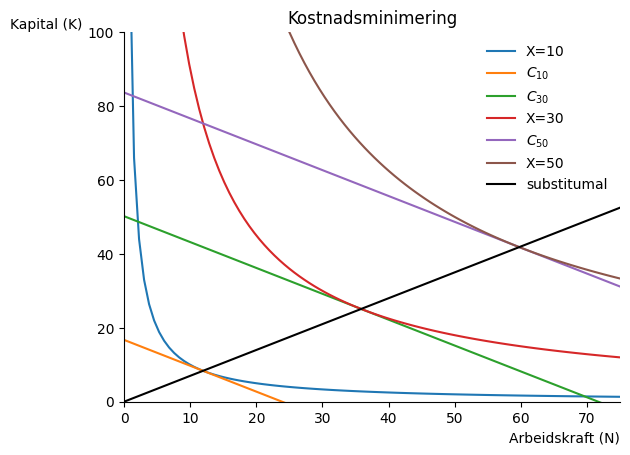

In [48]:
def substitumal(w,r,N):
    return N*w/r
ax.plot(n,substitumal(350,500,n),  color='black', label='substitumal')
ax.legend(loc='best',frameon=False)
fig1

**Oppgave**      
*I tillegg til faktorkostnaden har denne bedriften en fast kostnad på 10 000 NOK. Finn et uttrykk for total produksjonskostnad for X enheter produkt. Bruk dette uttrykket til å lage en funksjon som angir gjennomsnittskostnad (AC) på lang sikt. Tegn AC funksjonen ved å sette din funksjon inn i koden nedenfor:*

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


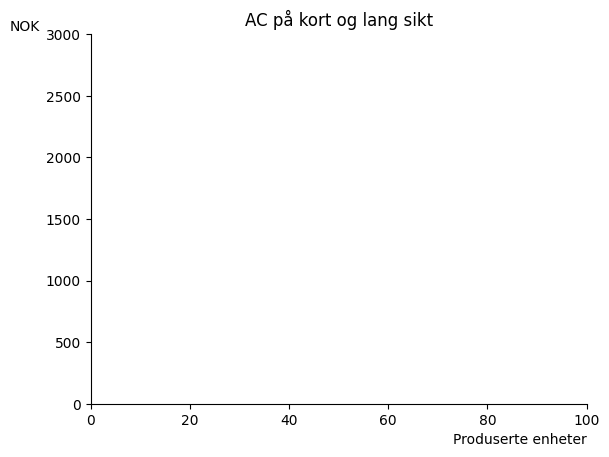

In [49]:
x_num=np.linspace(0.001,100, 100)

fig2, ax = plt.subplots()
ax.set_ylabel('NOK', loc='top', rotation = 0)
ax.set_xlabel('Produserte enheter', loc='right')
ax.set(xlim=(0,100))
ax.set(ylim=(0,3000))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
                

# plott funksjonen her

# ax.plot(x_num,DIN FUNKSJON, label='AC på lang sikt')

# tittel
ax.set_title('AC på kort og lang sikt')

#vis navnene:
ax.legend(loc='best',frameon=False);

**Oppgave fortsetter**      
*I forelesning 11 har dere allerede funnet et utrykk for bedriftens totale produksjonskostnad på kort sikt som en funksjon av produsert mengde og kapitalbeholdningen: $C_s(X, K_0)=10000 + 500K_0 +\frac{350X^2}{K_0}$. Beregn den totale gjennomsnittskostnaden, og plott dette inn i figuren for $K=10, K=25, K=50$ sammen med AC på lang sikt. Bruk figuren til å forklare forholdet mellom gjennomsnittskostnaden på kort og lang sikt.*

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


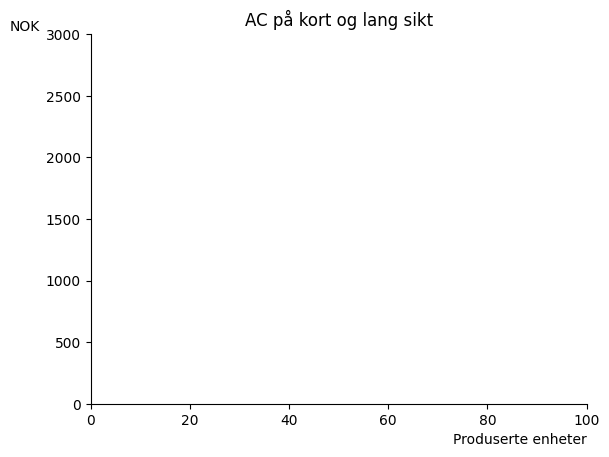

In [50]:
# skriv ditt svar her

ax.legend(loc='best',frameon=False)
fig2


### 2. Estimering

Anta at vi som økonomer tror at bedriften har følgende produktfunksjon: 
$$x=ZN^aK^b. \tag{3}$$

Ved å bruke fremgangsmåten og koden ovenfor kan vi vise at likning (1) innebærer at $K=(\frac{w}{r})(\frac{b}{a})N$. (Legg merke til at det relative forholdet mellom faktorene i en kostnadsminimerende løsning er avhengig av både økonomiske og produksjonstekniske forhold her). Herfra kan vi finne bedriftens etterspørsel etter de to faktorene.

In [51]:
# angi nye symboler

X,Z,a,b,w,r =sp.symbols('X Z a b w r', real=True, positive=True)

# produktfunksjon
x_0 = Z*N**a*K**b

# løs for produksjon av mengde X gitt forholdet ovenfor

K_sol=sp.solve(sp.Eq((x_0).subs(N,K*a*r/(b*w)),X),K)[0]
N_sol=sp.solve(sp.Eq((x_0).subs(K,N*b*w/(a*r)),X),N)[0]
display(K_sol)
display(N_sol)

(X*b**a*w**a/(Z*a**a*r**a))**(1/(a + b))

(X*a**b*r**b/(Z*b**b*w**b))**(1/(a + b))

In [52]:
# beregne totalkostnad

Kostnad= w*N_sol+r*K_sol
display(Kostnad)

r*(X*b**a*w**a/(Z*a**a*r**a))**(1/(a + b)) + w*(X*a**b*r**b/(Z*b**b*w**b))**(1/(a + b))

Så langt klarer vi å komme med en teoretisk modell. Som analytikere har vi tilgang til faktorpriser ($w,r$), og vi har muligens data på bedriftens produksjon og faktorforbruk. Vi kan bruke dette for å estimere verdier på det som vi ikke kjenner i produktfunksjon, nemlig $Z, a, b$. Uttrykket i (3) er ikke lineært, og det er enklere å estimere lineære sammenhenger. Da kan vi bruke logaritmer.

In [53]:
sp.log(x_0).expand(force=True)

a*log(N) + b*log(K) + log(Z)

Da kan vi skrive (3) om til

$$ ln(x)=ln(Z)+a\;ln(N)+b\;ln(K)\tag{4}$$

La oss lage litt data som vi kan estimere på.

In [54]:
from numpy import random as rd

import statsmodels as sm
import pandas as pd

#se om initialisering av rd nedenfor
# rd.seed(10)

samp_size=100

df=pd.DataFrame({'N':np.exp(rd.normal(3,1,samp_size)), 
                 'K':np.exp(rd.normal(2,1,samp_size)), 
                 'Z':np.exp(rd.normal(0,1,samp_size))
                })
A=rd.rand()
B=rd.rand()
df['x']=df['Z']*df['N']**A*df['K']**B

df


,N,K,Z,x
0,2.587447,8.434889,3.737835,10.038318
1,8.817831,6.755665,3.826204,17.642138
2,4.189322,2.439912,0.543077,1.356887
3,7.428598,1.223919,4.091251,11.385855
4,9.493798,2.053578,0.605533,2.156991
...,...,...,...,...
95,26.191399,5.393293,5.811937,43.004840
96,10.926639,7.749641,0.496321,2.627087
97,27.768969,2.817046,1.289254,8.360809
98,59.661651,4.341533,0.609329,6.373654


Her har vi laget 100 observasjoner på arbeidskraft og kapital (vi har også laget 100 observasjoner på Z som representerer "støy" i statistisk sammenheng). Så har vi generert et tall mellom 0 og 1 for a og et annet tall mellom 0 og 1 for b. Disse tallene har vi brukt for å lage produksjonsnivået x fra denne sammenhengen.         

**NB denne koden genererer forskjellige data hver gang! Dersom vi vil at vårt arbeid skal være reproduserbart (dvs kunne verifiseres av andre med samme kode) må vi bruke en initialisering av `rd`. Dette gjøres med en "seed". Prøv å skrive rd.seed(10) i koden etter at du importerer pakkene i kodecellen ovenfor. Kjør cellen og noter deg dataene i første linje. Kjør cellen på nytt så bør du få samme data**      

Vi kjenner ikke verdien på a og b og må estimere verdier for disse parametre. Vi begynner med å ta logaritmer av våre dataserier.

In [55]:
df['lnN']=np.log(df['N'])
df['lnK']=np.log(df['K'])
df['lnZ']=np.log(df['Z'])
df['lnx']=np.log(df['x'])

df

,N,K,Z,x,lnN,lnK,lnZ,lnx
0,2.587447,8.434889,3.737835,10.038318,0.950672,2.132377,1.318507,2.306410
1,8.817831,6.755665,3.826204,17.642138,2.176776,1.910381,1.341873,2.870290
2,4.189322,2.439912,0.543077,1.356887,1.432539,0.891962,-0.610504,0.305193
3,7.428598,1.223919,4.091251,11.385855,2.005337,0.202058,1.408851,2.432372
4,9.493798,2.053578,0.605533,2.156991,2.250639,0.719584,-0.501646,0.768714
...,...,...,...,...,...,...,...,...
95,26.191399,5.393293,5.811937,43.004840,3.265431,1.685156,1.759914,3.761313
96,10.926639,7.749641,0.496321,2.627087,2.391204,2.047647,-0.700533,0.965876
97,27.768969,2.817046,1.289254,8.360809,3.323919,1.035689,0.254064,2.123555
98,59.661651,4.341533,0.609329,6.373654,4.088689,1.468227,-0.495397,1.852173


Nå har vi det meste av det som inngår i likning (4). Vi skal bruke pakken `statsmodels` til å gjennomføre en enkel estimering (regresjon med OLS - Ordinary Least Squares).

In [56]:
import statsmodels.formula.api as smf

mod = smf.ols(formula='lnx ~ lnN + lnK', data=df)
res = mod.fit()
print(res.summary())
print(res.params)


                            OLS Regression Results                            
Dep. Variable:                    lnx   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     8.193
Date:                Fri, 21 Mar 2025   Prob (F-statistic):           0.000516
Time:                        14:52:41   Log-Likelihood:                -137.36
No. Observations:                 100   AIC:                             280.7
Df Residuals:                      97   BIC:                             288.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4719      0.422      1.119      0.2

Legg merke til at `res.params` gir oss ei "liste" med koeffisienter nederst. Dette er en Pandas Series object. lnZ er "Intercept" `res.params['Intercept']`, a er `res.params['lnN']`, b er `res.params['lnK']`. Legg merke til at `res.params['Intercept']`=ln Z. For å finne Z må vi skrive om $e^{lnZ}=e^{res.params['Intercept']}$, dvs $Z=e^{res.params['Intercept']}$. Vi kan bruke dette til å sette inn fra regresjonen i kostnadsfunksjon.

In [57]:
Z_num = np.exp(res.params['Intercept'])
print("Estimert Z er", Z_num)


Estimert Z er 1.602978452597217


In [58]:
print("Estimert verdi på a er", res.params['lnN'])
print("Estimert verdi på b er", res.params['lnK'])

Estimert verdi på a er 0.4083985927446626
Estimert verdi på b er 0.1973944426550641


**Oppgave**       
*Hvilke skalaegenskaper har denne produktfunksjonen?*

Nå kan vi beregne kostnadsfunksjonen til bedriften. La oss anta som før $w=350, r=500$. Vi kan tegne totalkostnad, gjennomsnittskostnad og grensekostnad.

In [59]:
# definer funksjoner

C=sp.lambdify(
    (w, r,X,Z,a,b), 
    w*N_sol+r*K_sol
)

avgC=sp.lambdify(
    (w, r,X,Z,a,b), 
    (w*N_sol+r*K_sol)/X
)

dC=sp.lambdify(
    (w, r,X,Z,a,b), 
    sp.diff(w*N_sol+r*K_sol,X)
)

#sett inn verdier

display(C(350,500,X,Z_num,res.params['lnN'],res.params['lnK']))
display(avgC(350,500,X,Z_num,res.params['lnN'],res.params['lnK']))
display(dC(350,500,X,Z_num,res.params['lnN'],res.params['lnK']))

339.146449002204*X**1.65072878287575

339.146449002204*X**0.650728782875755

559.838804978043*X**0.650728782875755

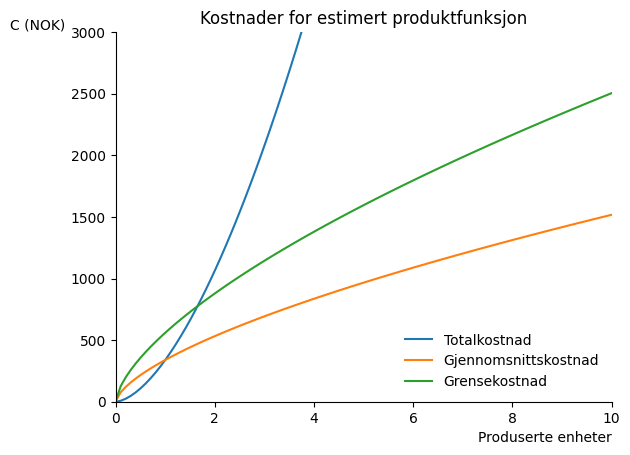

In [60]:
X=np.linspace(0.001,10, 100)

fig3, ax = plt.subplots()
ax.set_ylabel('C (NOK)', loc='top', rotation = 0)
ax.set_xlabel('Produserte enheter', loc='right')
ax.set(xlim=(0,10))
ax.set(ylim=(0,3000))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
                

# plott funksjonen her

ax.plot(X,
        C(350,500,X,Z_num,res.params['lnN'],res.params['lnK'])
        ,label='Totalkostnad')
ax.plot(X,
        avgC(350,500,X,Z_num,res.params['lnN'],res.params['lnK'])
        ,label='Gjennomsnittskostnad')
ax.plot(X,
        dC(350,500,X,Z_num,res.params['lnN'],res.params['lnK'])
        ,label='Grensekostnad')


# tittel
ax.set_title('Kostnader for estimert produktfunksjon')

#vis navnene:
ax.legend(loc='best',frameon=False);



**Oppgave**        

*Vi skal analysere årlig data fra Tesla på kapitalutgifter (USD), arbeidere, og antall biler laget i perioden 2012-2023.*    



In [61]:
# last inn data

df1=pd.read_csv("https://raw.githubusercontent.com/uit-sok-1006-v25/uit-sok-1006-v25.github.io/main/tesladata_2023.csv",delimiter=";")


df1


,YEAR,CAPEX,Arbeidere,Produksjon
0,2012,239200000,2964,2663
1,2013,264200000,5859,22477
2,2014,969900000,10161,31655
3,2015,1635000000,13058,50658
4,2016,1440000000,17782,76285
5,2017,4081000000,37543,103181
6,2018,2319000000,48817,245506
7,2019,1432000000,48016,365232
8,2020,3232000000,70757,509737
9,2021,6482000000,99290,930422


*a) Plott disse seriene i en figur med tid på den horisontale aksen.*   


In [62]:
# skriv svaret ditt her

*Anta at produktfunksjonen for Tesla er som gitt i (3) ovenfor. Vi skal undersøke skalaegenskaper til Teslas produktfunksjon. I forelesning 10 (paperet om Kina) så vi at man kunne estimere følgende likning for å undersøke dette:*

\begin{equation}
  ln (\frac{x}{N}) = ln Z + (a+b-1)\;ln N + b\; ln (\frac{K}{N})\tag{5}
\end{equation}

*Kjør følgende kode for å estimere denne likningen:*

In [63]:
# Vi skal estimere ln(xperN) = konstant + (a+b-1)ln(N) +bln(KperN)

# Vi er interessert i om a+b-1 er statistisk annerledes enn 0.

# I tabellen se på t verdien på ln(N), er dette over 2 kan vi konkludere med at koeffisienten ikke er null.

# Generer variablene: husk at ln(x/N)=ln(x)-ln(N) osv
df1['lnN']=np.log(df1['Arbeidere'])
df1['lnKperN']=np.log(df1['CAPEX'])-df1['lnN']
df1['lnxperN']=np.log(df1['Produksjon'])-df1['lnN']

# Estimer ved hjelp av ols.

mod = smf.ols(formula='lnxperN ~ lnN + lnKperN', data=df1)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                lnxperN   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     20.79
Date:                Fri, 21 Mar 2025   Prob (F-statistic):           0.000423
Time:                        14:52:42   Log-Likelihood:                -2.3413
No. Observations:                  12   AIC:                             10.68
Df Residuals:                       9   BIC:                             12.14
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3656      2.878      0.127      0.9

c:\Users\dcl000\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  k, _ = kurtosistest(a, axis)


*b) Hva viser din analyse om skalautbytte til Tesla?*    
*c) Er du fornøyd med resultatene fra analysen, eller er det noe som ikke ser helt riktig ut?*    
*d) Er ditt resultat forenelig med [denne analysen](https://cleantechnica.com/2018/07/22/peeking-behind-teslas-cost-of-materials-curtain/) av Tesla sine kostnader?*   
*e) Gitt denne analysen hvilke andre variabler bør inkluderes i (3), og hvordan vil den nye produktfunksjonen se ut (gitt at den er Cobb-Douglas)?* 

In [64]:
# Skriv ditt svar her